# Kvadratické momenty plochy

### Př1:

Určete kvadratické momenty průřezu na obrázku k osám $y$ a $z$.

### Řešení

Načtení potřebných knihoven,

In [8]:
from IPython.core.display import Image
import sympy as sp
from sympy.matrices import Matrix
sp.init_printing()

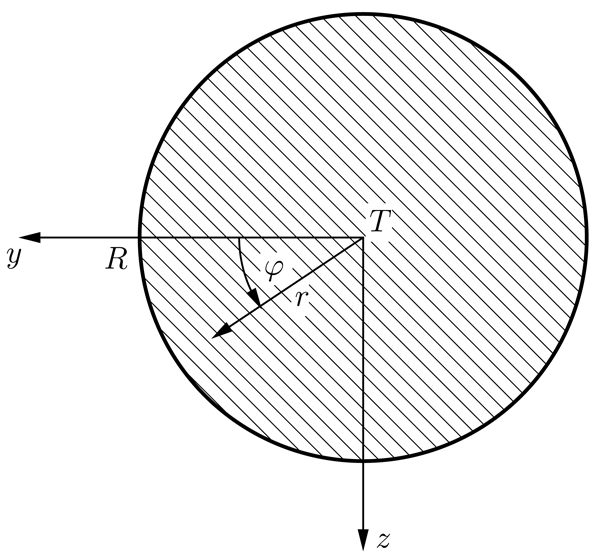

In [2]:
Image(filename='prurez1_.png')

Zavedení potřebných symbolů,

In [3]:
r,phi=sp.symbols('r varphi')
R,d=sp.symbols('R d')

Protože jde o rotačně symterický průřez, je výhodné zavést polární souřadnice místo kartézských, tj.

\begin{eqnarray}
  y&=&r\cos\varphi, \\
  z&=&r\sin\varphi,
\end{eqnarray}

In [4]:
y=r*sp.cos(phi)
z=r*sp.sin(phi)
y,z

včetně Jacobiánu a jeho determinantu

$$
  \det\left( \boldsymbol{J}\right) = 
  \left| 
  \begin{array}{cc}
    \frac{\partial y}{\partial r} & \frac{\partial y}{\partial \varphi} \\
    \frac{\partial z}{\partial r} & \frac{\partial z}{\partial \varphi}
  \end{array}
  \right|=
  \left| 
  \begin{array}{cc}
    \cos\varphi & -r\sin\varphi \\
    \sin\varphi & r\cos\varphi
  \end{array}
  \right|=r
$$

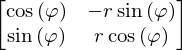

In [12]:
Jac=Matrix([[y.diff(r),y.diff(phi)],[z.diff(r),z.diff(phi)]])
Jac

In [13]:
detJac=Jac.det()
detJac

a po úpravě

In [14]:
detJac=sp.collect(r,detJac)
detJac

*Osový kvadratický moment* k ose $y$

$$
  J_y=\int_\Omega z^2\mathrm{d}S.
$$

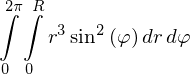

In [17]:
Jy=sp.Integral(sp.Integral(z**2*detJac,[r,0,R]),[phi,0,2*sp.pi])
Jy

a hodnota integrálu pro $r=R$ a $r=d/2$,

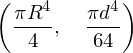

In [19]:
Jy_eval=Jy.doit()
Jy_eval,Jy_eval.subs(R,d/2)

*Osový kvadratický moment* k ose $z$

$$
  J_z=\int_\Omega y^2\mathrm{d}S.
$$

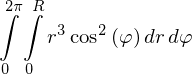

In [20]:
Jz=sp.Integral(sp.Integral(y**2*detJac,[r,0,R]),[phi,0,2*sp.pi])
Jz

a hodnota integrálu pro $r=R$ a $r=d/2$,

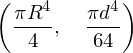

In [21]:
Jz_eval=Jz.doit()
Jz_eval,Jz_eval.subs(R,d/2)

*Deviační kvadratický moment* k ose $y$ a $z$ 

$$
  J_{yz}=\int_\Omega yz\mathrm{d}S.
$$

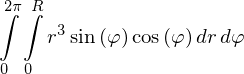

In [23]:
Jyz=sp.Integral(sp.Integral(y*z*detJac,[r,0,R]),[phi,0,2*sp.pi])
Jyz

a hodnota integrálu pro $r=R$ a $r=d/2$,

In [24]:
Jyz_eval=Jyz.doit()
Jyz_eval,Jyz_eval.subs(R,d/2)

### Př2:

Najděte *hlavní souřadnicový systém* a *hlavní centrální souřadnicový systém*.

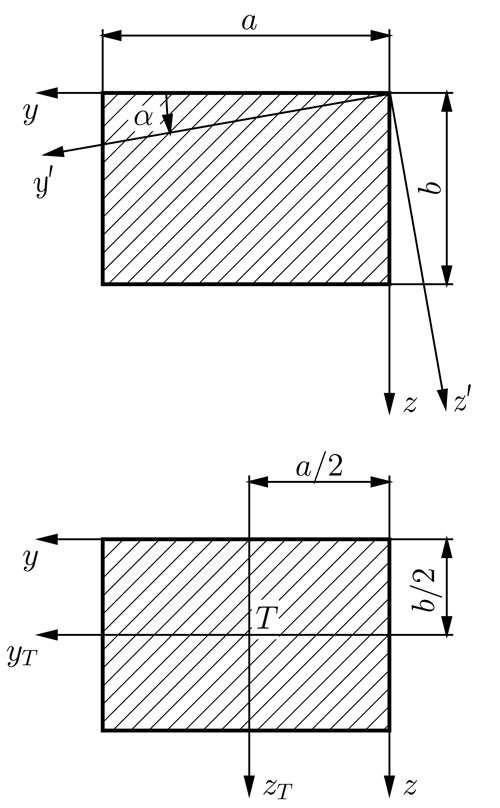

In [26]:
Image(filename='prurez2_.png')

### Řešení

Zavedení potřebných symbolů,

In [27]:
y,z=sp.symbols('y z')
a,b=sp.symbols('a b')

Osové momenty a deviační moment k osám $y$ a $z$. Nejdříve osový moment $J_y$,

$$
  J_y = \int_\Omega z^2\mathrm{d}S,
$$

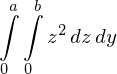

In [28]:
Jy2=sp.Integral(sp.Integral(z**2,[z,0,b]),[y,0,a])
Jy2

po integraci se dostane,

In [29]:
Jy2_eval=Jy2.doit()
Jy2_eval

Další je osový moment k ose $z$,

$$
  J_z = \int_\Omega y^2\mathrm{d}S,
$$

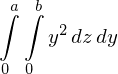

In [30]:
Jz2=sp.Integral(sp.Integral(y**2,[z,0,b]),[y,0,a])
Jz2

po integraci se dostane,

In [31]:
Jz2_eval=Jz2.doit()
Jz2_eval

Poslední zbývá deviační moment,

$$
  J_{yz} = \int_\Omega yz\mathrm{d}S,
$$

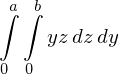

In [32]:
Jyz2=sp.Integral(sp.Integral(y*z,[z,0,b]),[y,0,a])
Jyz2

který má po integraci hodnotu,

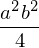

In [33]:
Jyz2_eval=Jyz2.doit()
Jyz2_eval

**Natočení hlavního souřadnicového systému**, viz obrázek, na kterém je naznačena kladná orientace úhlu $\alpha$. Natočení hlavního souřadnicového sytému se vyjádří vzorcem,

$$
  \alpha=\frac{1}{2}\arctan \frac{2\left| J_{yz}\right| }{J_y-J_z},
$$

čímž se dostane hodnota $\alpha\in\left[ -\pi/4,\pi/4\right]$. Pro v absolutní hodnotě větší úhly $\alpha$ dojde k vzájemné záměně hlavních os. 

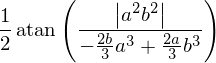

In [34]:
alpha2=sp.Rational(1,2)*sp.atan(abs(2*Jyz2_eval)/(Jy2_eval-Jz2_eval))
alpha2

Po dosazení za $a=2$ a $b=1$ se dostane úhel,

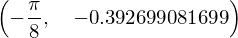

In [35]:
alpha2_eval=alpha2.subs({a:2,b:1})
alpha2_eval,float(alpha2_eval)

**Hlavní hodnoty** osových momentů se vypočítají podle vztahů,

$$
  J_{1,2}=\frac{J_y+J_z}{2}\pm\sqrt{\left( \frac{J_y-J_z}{2}\right)^2+J_{yz}^2}.
$$

Tedy

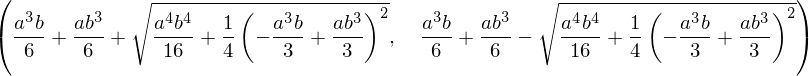

In [36]:
J2_1=(Jy2_eval+Jz2_eval)/2+sp.sqrt((Jy2_eval-Jz2_eval)**2/4+Jyz2_eval**2)
J2_2=(Jy2_eval+Jz2_eval)/2-sp.sqrt((Jy2_eval-Jz2_eval)**2/4+Jyz2_eval**2)
J2_1,J2_2

Po dosazení za $a=2$ a $b=1$ se dostane,

In [37]:
J2_1_eval=J2_1.subs({a:2,b:1})
J2_2_eval=J2_2.subs({a:2,b:1})
float(J2_1_eval),float(J2_2_eval)

### Př3:

Najděte hlavní centrální souřadnicový systém pro příčný průřez podle obrázku.

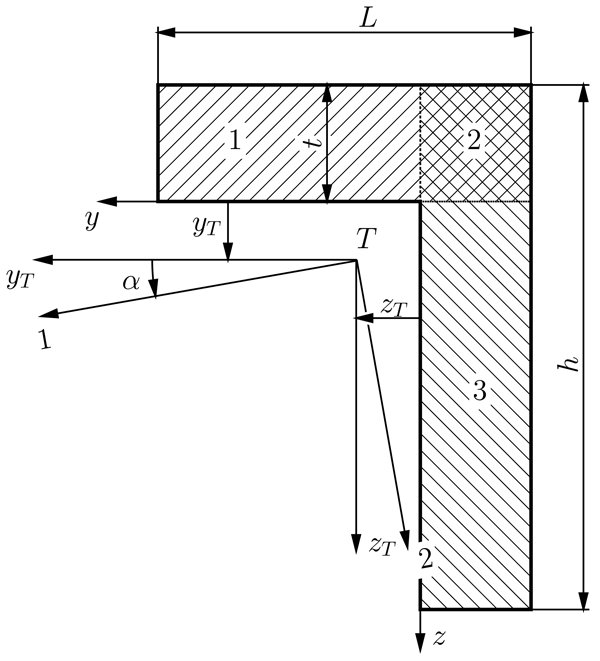

In [38]:
Image(filename='prurez3_.png')

### Řešení

Zavedení proměnných,

In [40]:
L,h,t=sp.symbols('L h t')

Nejdříve je nutné spočítat polohu těžiště příčného průřezu. Příčný průřez rozdělíme tím nejhorším způsobem na dva obdélníky a jeden čtverec, abychom si procvičili tzv. *Steinerovy věty*,

\begin{eqnarray}
  J_y&=&J_{y_T}+z_t^2S, \\
  J_z&=&J_{z_T}+y_t^2S, \\
  J_{yz}&=&J_{y_Tz_T}+z_ty_tS,
\end{eqnarray}

kde $S$ je plocha průřezu, $J_{y_T}$, $J_{z_T}$ a $J_{y_Tz_T}$ jsou kvadratické momenty k *centrálnímu souřadnicovému systému* a $y_t$ a $z_t$ jsou vzdálenosti počátku souřadnic $o_{yz}$ od počátku centrálního souřadnicového systému $o_{y_Tz_T}$ ve směru osy $y$ a $z$.

Nejdříve těžiště,

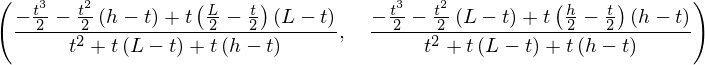

In [43]:
yT=((L-t)/2*t*(L-t)-t/2*t*t-t/2*(h-t)*t)/(t*(L-t)+t*t+(h-t)*t)
zT=(-t/2*t*(L-t)-t/2*t*t+(h-t)/2*(h-t)*t)/(t*(L-t)+t*t+(h-t)*t)
yT,zT

Dosazením za $t=1$, $h=20$ a $L=10$ se pro $y_T$ a $z_T$ dostane,

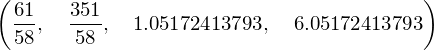

In [44]:
yT_eval=yT.subs({t:1,h:20,L:10})
zT_eval=zT.subs({t:1,h:20,L:10})
yT_eval,zT_eval,float(yT_eval),float(zT_eval)

První obdélník má kde svému *hlavnímu centrálnímu souřadnicovému systému* následující kvadratické momenty, které se spočítají podle vztahů (viz. Př2),

\begin{eqnarray}
  &&J_{y_{T_1}}=\frac{bh^3}{12}, \\
  &&J_{z_{T_1}}=\frac{b^3h}{12}, \\
  &&J_{y_{T_1}z_{T_1}}=0,
\end{eqnarray}

kde $b$ a $h$ jsou šířka a výška tohot průřezu.

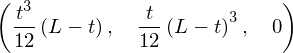

In [45]:
Jy31=(L-t)*t**3/12
Jz31=(L-t)**3*t/12
Jyz31=0
Jy31,Jz31,Jyz31

Posunutí počátků souřadnic nutných k použití *Steinerových vět*. Posunutí počátku $o_{y_{T_1}z_{T_1}}$ vzhledem k $o_{y_Tz_T}$ je ve směru osy $y_T$ v záporném smyslu, proto hodnota $y_{t_1}$ musí být záporná. Je možnost se také orientovat podle kvadrantů. Protože počátek $o_{y_{T_1}z_{T_1}}$ leží ve 4. kvadrantu souřadnicového systému $y_Tz_T$, musí být hodnota posunutí $y_{t_1}<0$ a $z_{t_1}>0$.

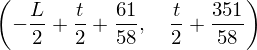

In [46]:
yt1=-((L-t)/2-yT_eval)
zt1=t/2+zT_eval
yt1,zt1

Hodnota osových a deviačního momentu prvního obdélníku k souřadnicovému systému $y_Tz_T$ vyjádřená pomocí *Steinerových vět*,

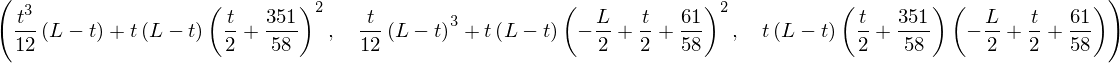

In [49]:
Jy31T=Jy31+zt1**2*((L-t)*t)
Jz31T=Jz31+yt1**2*((L-t)*t)
Jyz31T=Jyz31+yt1*zt1*((L-t)*t)
Jy31T,Jz31T,Jyz31T

Dosazením za $t=1$, $h=20$ a $L=10$ se pro $J^1_{y_T}$, $J^1_{z_T}$ a  $J^1_{y_Tz_T}$ dostane,

In [51]:
Jy31T_eval=Jy31T.subs({L:10,t:1,h:20})
Jz31T_eval=Jz31T.subs({L:10,t:1,h:20})
Jyz31T_eval=Jyz31T.subs({L:10,t:1,h:20})
float(Jy31T_eval),float(Jz31T_eval),float(Jyz31T_eval)

Kvadratické momenty $J_{y_{T_2}}$, $J_{z_{T_2}}$ a $J_{y_{T_2}z_{T_2}}$ k vlastnímu *hlavnímu souřadnicovému systému* pro druhý obdélník,

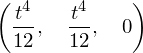

In [52]:
Jy32=t**4/12
Jz32=t**4/12
Jyz32=0
Jy32,Jz32,Jyz32y_{T_2}

Posunutí počátků souřadnic nutných k použití *Steinerových vět*. Obě posunutí počátku $o_{y_{T_2}z_{T_2}}$ vzhledem k $o_{y_Tz_T}$ jsou kladná, protože počátek $o_{y_{T_2}z_{T_2}}$ leží ve 3. kvadrantu souřadnicového systému $y_Tz_T$.

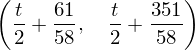

In [53]:
yt2=t/2+yT_eval
zt2=t/2+zT_eval
yt2,zt2

*Steinerovy vztahy* pro druhý obdélník (čtverec),

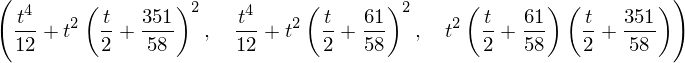

In [58]:
Jy32T=Jy32+zt2**2*(t*t)
Jz32T=Jz32+yt2**2*(t*t)
Jyz32T=Jyz32+yt2*zt2*(t*t)
Jy32T,Jz32T,Jyz32T

Dosazením za $t=1$, $h=20$ a $L=10$ se pro $J^2_{y_T}$, $J^2_{z_T}$ a  $J^2_{y_Tz_T}$ dostane,

In [55]:
Jy32T_eval=Jy32T.subs({L:10,t:1,h:20})
Jz32T_eval=Jz32T.subs({L:10,t:1,h:20})
Jyz32T_eval=Jyz32T.subs({L:10,t:1,h:20})
float(Jy32T_eval),float(Jz32T_eval),float(Jyz32T_eval)

Kvadratické momenty $J_{y_{T_3}}$, $J_{z_{T_3}}$ a $J_{y_{T_3}z_{T_3}}$ k vlastnímu *hlavnímu souřadnicovému systému* pro třetí obdélník,

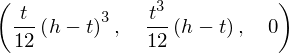

In [56]:
Jy33=t*(h-t)**3/12
Jz33=t**3*(h-t)/12
Jyz33=0
Jy33,Jz33,Jyz33

Posunutí počátků souřadnic nutných k použití *Steinerových vět*. Obě posunutí počátku $o_{y_{T_3}z_{T_3}}$ vzhledem k $o_{y_Tz_T}$ jsou různých znamének, protože počátek $o_{y_{T_3}z_{T_3}}$ leží ve 2. kvadrantu souřadnicového systému $y_Tz_T$. Přesněji $y_{t_3}>0$ a $z_{t_3}<0$.

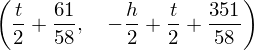

In [57]:
yt3=t/2+yT_eval
zt3=-((h-t)/2-zT_eval)
yt3,zt3

Odpovídající *Steinerovy vztahy* pro třetí obdélník,

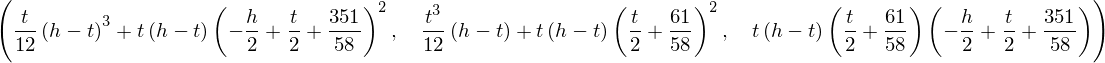

In [59]:
Jy33T=Jy33+zt3**2*((h-t)*t)
Jz33T=Jz33+yt3**2*((h-t)*t)
Jyz33T=Jyz33+yt2*zt3*((h-t)*t)
Jy33T,Jz33T,Jyz33T

Dosazením za $t=1$, $h=20$ a $L=10$ se pro $J^2_{y_T}$, $J^2_{z_T}$ a  $J^2_{y_Tz_T}$ dostane,

In [60]:
Jy33T_eval=Jy33T.subs({L:10,t:1,h:20})
Jz33T_eval=Jz33T.subs({L:10,t:1,h:20})
Jyz33T_eval=Jyz33T.subs({L:10,t:1,h:20})
float(Jy33T_eval),float(Jz33T_eval),float(Jyz33T_eval)

Celkové momenty (celého příčného průřezu),

In [61]:
Jy3T=float(Jy31T_eval+Jy32T_eval+Jy33T_eval)
Jz3T=float(Jz31T_eval+Jz32T_eval+Jz33T_eval)
Jyz3T=float(Jyz31T_eval+Jyz32T_eval+Jyz33T_eval)
Jy3T,Jz3T,Jyz3T

**Hlavní souřadnicový systém**

Úhel natočení hlavního centrálního souřadnicového systému, viz obrázek,

In [63]:
alpha3=sp.Rational(1,2)*sp.atan(abs(2*Jyz3T)/(Jy3T-Jz3T))
alpha3,float(alpha3/sp.pi*180)

Hodnoty osových momentů v hlavním souřadnicovém systému,

In [ ]:
#dodelat :-)